In [0]:
import pandas as pd                                                             #Importing Liraries
import tensorflow as tf

In [0]:
df1=pd.read_csv('PythonBlogs(withcode).csv')
df2=pd.read_csv('CppBlogs(with code).csv')
df3=pd.read_csv('JavaBlogs(withcode).csv')                                      #Importing Dataset
df2=df2.rename(columns={'Blogs':'Blog'})
dataset=pd.concat([df1,df2,df3],axis=0,ignore_index=True)

In [0]:
ann=tf.keras.models.load_model('blogs.h5')                                      #Loading The Trained Model                             

In [4]:
import nltk
nltk.download('stopwords')
import re                                                                       #Importing NLP Libraries
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
corpus=[]
for i in range(len(dataset)):
  blog=re.sub('[^a-zA-Z;<<>>~]',' ',str(dataset['Blog'][i])).lower().split()
  ps=PorterStemmer()
  keywords=['while','if','for','else','do','from','as','not','in']
  new_stopwords=[  i  for i in stopwords.words('english') if not i in keywords] #Cleaning The Data
  blog=[ps.stem(words) for words in blog if not words in set(new_stopwords)]
  blog=' '.join(blog)
  corpus.append(blog)

from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer()                                                            #Tokenising And Assigning Features
X=cv.fit_transform(corpus).toarray()


In [0]:
def blog_joiner(list_of_blogs):
  new_blog=' '.join(list_of_blogs)
  for i in range(len(dataset)):
    blog=re.sub('[^a-zA-Z;>><<~]',' ',str(new_blog)).lower().split()
    ps=PorterStemmer()
    keywords=['while','if','for','else','do','from','as','not','in']
    new_stopwords=[ i for i in stopwords.words('english') if not i in keywords] #Joining All Blogs As One String
    blog=[ps.stem(words) for words in blog if not words in set(new_stopwords)]
    blog=' '.join(blog)
    new_corpus=[blog]
  new_X_test=cv.transform(new_corpus).toarray()
  new_y_predict=ann.predict(new_X_test)
  return new_y_predict


In [19]:
user_list_of_blogs=[""" Python is a general-purpose interpreted, interactive, object-oriented, and high-level programming language. It was created by Guido van Rossum during 1985- 1990. Like Perl, Python source code is also available under the GNU General Public License (GPL). This tutorial gives enough understanding on Python programming language.

Why to Learn Python?
Python is a high-level, interpreted, interactive and object-oriented scripting language. Python is designed to be highly readable. It uses English keywords frequently where as other languages use punctuation, and it has fewer syntactical constructions than other languages.

Python is a MUST for students and working professionals to become a great Software Engineer specially when they are working in Web Development Domain. I will list down some of the key advantages of learning Python:

Python is Interpreted − Python is processed at runtime by the interpreter. You do not need to compile your program before executing it. This is similar to PERL and PHP.

Python is Interactive − You can actually sit at a Python prompt and interact with the interpreter directly to write your programs.

Python is Object-Oriented − Python supports Object-Oriented style or technique of programming that encapsulates code within objects.

Python is a Beginner's Language − Python is a great language for the beginner-level programmers and supports the development of a wide range of applications from simple text processing to WWW browsers to games.

Characteristics of Python
Following are important characteristics of Python Programming −

It supports functional and structured programming methods as well as OOP.

It can be used as a scripting language or can be compiled to byte-code for building large applications.

It provides very high-level dynamic data types and supports dynamic type checking.

It supports automatic garbage collection.

It can be easily integrated with C, C++, COM, ActiveX, CORBA, and Java.

Hello World using Python.
Just to give you a little excitement about Python, I'm going to give you a small conventional Python Hello World program, You can try it using Demo link.

Live Demo
print ("Hello, Python!");
Applications of Python
As mentioned before, Python is one of the most widely used language over the web. I'm going to list few of them here:

Easy-to-learn − Python has few keywords, simple structure, and a clearly defined syntax. This allows the student to pick up the language quickly.

Easy-to-read − Python code is more clearly defined and visible to the eyes.

Easy-to-maintain − Python's source code is fairly easy-to-maintain.

A broad standard library − Python's bulk of the library is very portable and cross-platform compatible on UNIX, Windows, and Macintosh.

Interactive Mode − Python has support for an interactive mode which allows interactive testing and debugging of snippets of code.

Portable − Python can run on a wide variety of hardware platforms and has the same interface on all platforms.

Extendable − You can add low-level modules to the Python interpreter. These modules enable programmers to add to or customize their tools to be more efficient.

Databases − Python provides interfaces to all major commercial databases.

GUI Programming − Python supports GUI applications that can be created and ported to many system calls, libraries and windows systems, such as Windows MFC, Macintosh, and the X Window system of Unix.

Scalable − Python provides a better structure and support for large programs than shell scripting.

Audience
This Python tutorial is designed for software programmers who need to learn Python programming language from scratch.

Prerequisites
You should have a basic understanding of Computer Programming terminologies. A basic understanding of any of the programming languages is a plus."""]
user_corpus=blog_joiner(user_list_of_blogs)
prediction_table=pd.DataFrame({'C++':[user_corpus[0][0]*100],
                               'Java':[user_corpus[0][1]*100],                  #Predicting The Result
                               'Python':[user_corpus[0][2]*100]})
prediction_table  


,C++,Java,Python
0,0.007831,0.013689,99.978477


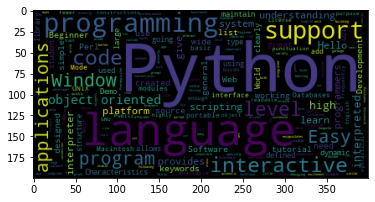

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt                                                 #Word Cloud Of The Blogs
plt.imshow(WordCloud().generate(' '.join(user_list_of_blogs)))